In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import csv
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
html = urlopen('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)')
bs = BeautifulSoup(html.read(), 'html.parser')

table = bs.find('table', {'class': "wikitable sortable static-row-numbers plainrowheaders srn-white-background"})

print(table)

<table border="1" class="wikitable sortable static-row-numbers plainrowheaders srn-white-background" style="text-align:right;">
<caption>GDP (US$ million) by country
</caption>
<tbody><tr class="static-row-header" style="text-align:center;vertical-align:bottom;">
<th rowspan="2">Country/Territory
</th>
<th rowspan="2"><a href="/wiki/United_Nations_geoscheme" title="United Nations geoscheme">Region</a>
</th>
<th colspan="2"><a href="/wiki/International_Monetary_Fund" title="International Monetary Fund">IMF</a><sup class="reference" id="cite_ref-GDP_IMF_11-1"><a href="#cite_note-GDP_IMF-11">[10]</a></sup><sup class="reference" id="cite_ref-13"><a href="#cite_note-13">[12]</a></sup>
</th>
<th colspan="2"><a href="/wiki/United_Nations" title="United Nations">United Nations</a><sup class="reference" id="cite_ref-UN_14-0"><a href="#cite_note-UN-14">[13]</a></sup>
</th>
<th colspan="2"><a href="/wiki/World_Bank" title="World Bank">World Bank</a><sup class="reference" id="cite_ref-15"><a href=

In [3]:
data = []

for row in table.findAll('tr')[2:]:
    row_data = []
    a = row.findAll('a')
    td = row.findAll('td')
    for x in a[0:2]:
        row_data.append(x.get_text().strip())
    for y in td[2:3]:
        row_data.append(y.get_text().strip())
    data.append(row_data)
    
print(data)

[['United States', 'Americas', '25,346,805'], ['China', 'Asia', '19,911,593'], ['Japan', 'Asia', '4,912,147'], ['Germany', 'Europe', '4,256,540'], ['United Kingdom', 'Europe', '3,376,003'], ['India', 'Asia', '3,291,398'], ['France', 'Europe', '2,936,702'], ['Canada', 'Americas', '2,221,218'], ['Italy', 'Europe', '2,058,330'], ['Brazil', 'Americas', '1,833,274'], ['Russia', 'Europe', '1,829,050'], ['South Korea', 'Asia', '1,804,680'], ['Australia', 'Oceania', '1,748,334'], ['Iran', 'Asia', '1,739,012'], ['Spain', 'Europe', '1,435,560'], ['Mexico', 'Americas', '1,322,740'], ['Indonesia', 'Asia', '1,289,295'], ['Saudi Arabia', 'Asia', '1,040,166'], ['Netherlands', 'Europe', '1,013,595'], ['Switzerland', 'Europe', '841,969'], ['Taiwan', 'Asia', '841,209'], ['Poland', 'Europe', '699,559'], ['Turkey', 'Asia', '692,380'], ['Sweden', 'Europe', '621,241'], ['Belgium', 'Europe', '609,887'], ['Argentina', 'Americas', '564,277'], ['Norway', 'Europe', '541,938'], ['Thailand', 'Asia', '522,012'], ['

In [4]:
with open('CSC221-webscrape-data.csv', mode='w') as csv_file:
    fieldnames = ['country', 'continent', 'GDP (US$ million)']
    write = csv.writer(csv_file)
      
    write.writerow(fieldnames)
    write.writerows(data)

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data = pd.read_csv("CSC221-webscrape-data.csv", encoding = "ISO-8859-1")
data

,country,continent,GDP (US$ million)
0,United States,Americas,"25,346,805"
1,China,Asia,"19,911,593"
2,Japan,Asia,"4,912,147"
3,Germany,Europe,"4,256,540"
4,United Kingdom,Europe,"3,376,003"
...,...,...,...
211,Palau,Oceania,244
212,Kiribati,Oceania,216
213,Nauru,Oceania,134
214,Montserrat,Americas,NaN


In [6]:
data['GDP (US$ million)'] = data['GDP (US$ million)'].str.replace(',', '').astype(float)
data.dropna(inplace=True)
data2 = data.head(10)
data2

,country,continent,GDP (US$ million)
0,United States,Americas,25346805.0
1,China,Asia,19911593.0
2,Japan,Asia,4912147.0
3,Germany,Europe,4256540.0
4,United Kingdom,Europe,3376003.0
5,India,Asia,3291398.0
6,France,Europe,2936702.0
7,Canada,Americas,2221218.0
8,Italy,Europe,2058330.0
9,Brazil,Americas,1833274.0


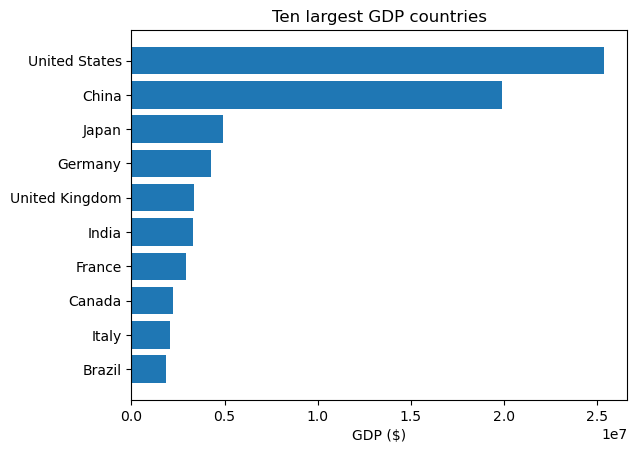

In [15]:
plt.rcdefaults()
fig, ax = plt.subplots()


GDP = data2['GDP (US$ million)']
y_pos = np.arange(len(GDP))
countries = data2['country']


ax.barh(y_pos, GDP, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('GDP ($)')
ax.set_title('Ten largest GDP countries')

plt.show()